In [10]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pylab as pylab
import pandas as pd
from operator import itemgetter

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc



pylab.rcParams['figure.figsize'] = 10, 10
plt.rc("font", size=23)


plt.rc('xtick', color='k', labelsize='medium', direction='in')
plt.rc('xtick.major', size=8, pad=12)
plt.rc('xtick.minor', size=8, pad=12)

plt.rc('ytick', color='k', labelsize='medium', direction='in')
plt.rc('ytick.major', size=8, pad=12)
plt.rc('ytick.minor', size=8, pad=12)

In [2]:
df_heart=pd.read_csv('framingham.csv')
#df_heart.replace(np.nan,"NaN")
df_heart.dropna(axis=0,inplace=True)

df_heart.head(30)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


fraction of class benign in train 0.15238789646372586 fraction of class benign in test 0.15191256830601094 fraction of class benign in full 0.15226899945325315
Grid best parameter (max.roc_auc):  {'model__C': 0.01519911082952933, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Grid best score (roc_auc):  0.7236646123665167
Grid best parameter (max.roc_auc) model on test:  0.7515760587406364
confusion matrix
[[530 246]
 [ 43  96]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.79       776
           1       0.28      0.69      0.40       139

    accuracy                           0.68       915
   macro avg       0.60      0.69      0.59       915
weighted avg       0.83      0.68      0.73       915

0.7515760587406364


C:\Users\sebas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:101: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


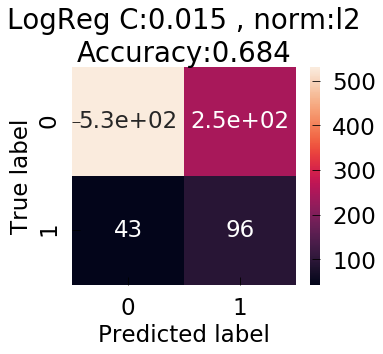

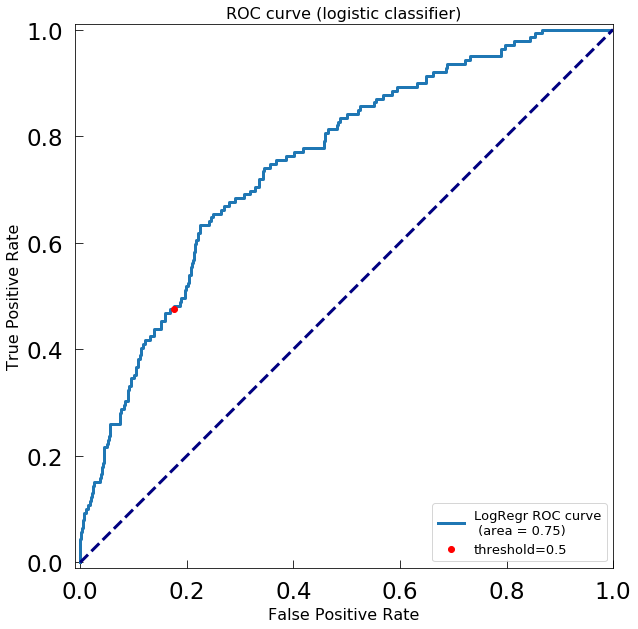

Features sorted per importance in discriminative process
[['age', 0.34089930998132295], ['sysBP', 0.22633383491010958], ['male', 0.16419142391550173], ['cigsPerDay', 0.1432449117630901], ['glucose', 0.1389075983396515], ['prevalentHyp', 0.12227026249686242], ['totChol', 0.08977423713028086], ['education', 0.0742762700485203], ['BPMeds', 0.05762154533174381], ['currentSmoker', 0.04489020449588619], ['prevalentStroke', 0.030893124712993405], ['heartRate', 0.029712704380863177], ['diaBP', 0.0248791774915342], ['BMI', 0.012558825706345785], ['diabetes', 0.005984483812603124]]


In [11]:
X_heart=np.array(df_heart[list(df_heart.columns)[:-1]])
y_heart=np.array(df_heart[list(df_heart.columns)[-1]])

X_train, X_test, y_train, y_test = train_test_split(X_heart,y_heart,
                                                   random_state=0,stratify=y_heart)
#stratify is here to make sure that you split keeping the repartition of labels unaffected

print("fraction of class benign in train",sum(y_train)/len(y_train),"fraction of class benign in test",sum(y_test)/len(y_test),"fraction of class benign in full",sum(y_heart)/len(y_heart))


sco='roc_auc'

from sklearn.pipeline import Pipeline

#create your logistic regression object, the class being slightly unbalanced add a class weight
logi_r=LogisticRegression(class_weight='balanced')



#put it in a pipeline : the pipeline allows you to put tasks to perfom in a sequential manner.
#Here particularly to scale subset of your data at a time when you will use the cross
#validation technic. By doing the scaling on each subset that is going for validation instead of 
#on the full training set
#you make sure that information about your test and validation are not leaking in your training.
#Scaling is important for some optimizers, generally speaking for technics other than logistic
#regression or decision tree, when you add a Lasso or Ridge regularization,
#when dealing with covariables that have a variety of scales, and finally I believe make model intepretation easier.

pipeline_lr=Pipeline([('scalar',StandardScaler()),('model',logi_r)])

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

grid_values = {'model__C': np.logspace(-5,2,100),'model__penalty':['l1','l2'],'model__solver':['liblinear']}
# define the hyperparameters you want to test
#with the range over which you want it to be tested. Note the model double underscore name of the parameters.

grid_lr_acc = GridSearchCV(pipeline_lr, param_grid = grid_values, scoring=sco)#Feed it to the GridSearchCV with the right
#score(here sc) over which the decision should be taken

grid_lr_acc.fit(X_train, y_train)#train your pipeline

y_decision_fn_scores_acc=grid_lr_acc.score(X_test,y_test)# calculate the score of your trained pipeline on the test

print('Grid best parameter (max.'+sco+'): ', grid_lr_acc.best_params_)#get the best parameters
print('Grid best score ('+sco+'): ', grid_lr_acc.best_score_)#get the best score calculated from the train/validation
#dataset
print('Grid best parameter (max.'+sco+') model on test: ', y_decision_fn_scores_acc)# get the equivalent score on the test
#dataset : again this is the important metric



from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

y_pred_test_c=grid_lr_acc.predict(X_test)#predict y_test from X_test thanks to your trained model

confusion_mc_c = confusion_matrix(y_test, y_pred_test_c)# check the number of mistake made with the default 
#threshold for your decision function
print("confusion matrix")
print(confusion_mc_c)
df_cm_c = pd.DataFrame(confusion_mc_c, 
                     index = [i for i in range(2)], columns = [i for i in range(2)])

plt.figure(figsize=(5,4))
sns.heatmap(df_cm_c, annot=True)
plt.title('LogReg C:'+str(grid_lr_acc.best_params_['model__C'])[:5]
          +' , norm:'+grid_lr_acc.best_params_['model__penalty']+'\nAccuracy:{0:.3f}'.format(accuracy_score(y_test, 
                                                                       y_pred_test_c)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

print(classification_report(y_test, y_pred_test_c))# check the overall capacity of your model on test set 
#according to a bunch of metric


import scipy as sc
# this three lines here are how you get the area under the ROC curve score which is very important for evaluating your model
y_score_lr_c = grid_lr_acc.decision_function(X_test)#decision_function gives you the proba for a point to be in
# a class
fpr_lr_c, tpr_lr_c, thre = roc_curve(y_test, y_score_lr_c)# this calculates the ROC curve
roc_auc_lr_c = auc(fpr_lr_c, tpr_lr_c)#finally this calculates the area under the curve
print(roc_auc_lr_c)
proba=sc.special.expit(thre)
for i in range(len(proba)):
    if abs(proba[i]-0.5)<0.1:
        keep=i
        break
        

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr_c, tpr_lr_c, lw=3, label='LogRegr ROC curve\n (area = {:0.2f})'.format(roc_auc_lr_c))
plt.plot(fpr_lr_c[keep], tpr_lr_c[keep],'ro',label='threshold=0.5')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (logistic classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

lr = LogisticRegression(penalty=grid_lr_acc.best_params_['model__penalty'],C=grid_lr_acc.best_params_['model__C'],
                       solver=grid_lr_acc.best_params_['model__solver'])
lr.fit(X_train_scaled, y_train)
w=lr.coef_[0]#get the weights

sorted_features=sorted([[list(df_heart.columns)[i],abs(w[i])] for i in range(len(w))],key=itemgetter(1),reverse=True)

print('Features sorted per importance in discriminative process')
print(sorted_features)

# Regression

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

## Not thinking too much

In [12]:
# Read in data as pandas dataframe and display first 5 rows
features = pd.read_csv('One_hot_temp.csv')
features.head(5)

,Unnamed: 0,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [14]:
features.columns

Index(['Unnamed: 0', 'year', 'month', 'day', 'temp_2', 'temp_1', 'average',
       'actual', 'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend',
       'week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs',
       'week_Tues', 'week_Wed'],
      dtype='object')

In [22]:
from sklearn.ensemble import RandomForestRegressor

y = np.array(features['actual'])

# Remove the labels from the features
# axis 1 refers to the columns
X= features.drop(['Unnamed: 0', 'year', 'month', 'day',
       'actual', 
       'week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs',
       'week_Tues', 'week_Wed'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                                           random_state = 42)

grid_values = {'criterion': ['mse'],
               'n_estimators':np.arange(600,1200,300), 
               'max_depth':np.arange(2,22,5),
               'min_samples_split':np.arange(2,20,4),
              'min_samples_leaf':np.arange(1,20,4)}# define the hyperparameters you want to test
#with the range over which you want it to be tested.

grid_tree_acc = GridSearchCV(RandomForestRegressor(), param_grid = grid_values, scoring='r2')#Feed it to the GridSearchCV with the right
#score over which the decision should be taken

grid_tree_acc.fit(X_train, y_train)

y_decision_fn_scores_acc=grid_tree_acc.score(X_test,y_test)

print('Grid best parameter (max. r2): ', grid_tree_acc.best_params_)#get the best parameters
print('Grid best score (r2): ', grid_tree_acc.best_score_)#get the best score calculated from the train/validation
#dataset
print('Grid best parameter (max. r2) model on test: ', y_decision_fn_scores_acc)# get the equivalent score on the test
#dataset : again this is the important metric

Grid best parameter (max. r2):  {'criterion': 'mse', 'max_depth': 17, 'min_samples_leaf': 13, 'min_samples_split': 18, 'n_estimators': 600}
Grid best score (r2):  0.8225554276932548
Grid best parameter (max. r2) model on test:  0.8329384238541613


In [24]:
RF = RandomForestRegressor(criterion=grid_tree_acc.best_params_['criterion'],
                              n_estimators=grid_tree_acc.best_params_['n_estimators'],
                             max_depth=grid_tree_acc.best_params_['max_depth'],
                             min_samples_leaf=grid_tree_acc.best_params_['min_samples_leaf'],
                             min_samples_split=grid_tree_acc.best_params_['min_samples_split'])
RF.fit(X_train, y_train)


w=RF.feature_importances_#get the weights

sorted_features=sorted([[list(X.columns)[i],abs(w[i])] for i in range(len(w))],key=itemgetter(1),reverse=True)

print('Features sorted per importance in discriminative process')
print(sorted_features)

Features sorted per importance in discriminative process
[['temp_1', 0.716554749781102], ['average', 0.16629835676140567], ['forecast_noaa', 0.04492278908352517], ['forecast_acc', 0.042375079427067926], ['forecast_under', 0.017388608507984803], ['temp_2', 0.00819024885257948], ['friend', 0.0042701675863347725]]


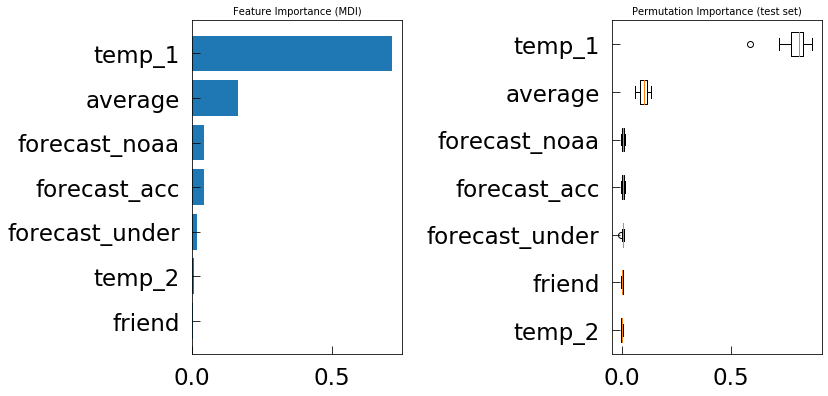

In [28]:
from sklearn.inspection import permutation_importance

feature_importance = w
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(list(X.columns))[sorted_idx])
plt.title('Feature Importance (MDI)',fontsize=10)

result = permutation_importance(RF, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(list(X.columns))[sorted_idx])
plt.title("Permutation Importance (test set)",fontsize=10)
fig.tight_layout()
plt.show()


Using forecast here is a bit stupid... Let's retrain the model without those

## Smaller and better features sets

In [29]:
from sklearn.ensemble import RandomForestRegressor

y = np.array(features['actual'])

# Remove the labels from the features
# axis 1 refers to the columns
X= features.drop(['Unnamed: 0', 'year', 'month', 'day',
       'actual', 'forecast_noaa', 'forecast_acc', 'forecast_under',
       'week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs',
       'week_Tues', 'week_Wed'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                                           random_state = 42)

grid_values = {'criterion': ['mse'],
               'n_estimators':np.arange(600,1200,300), 
               'max_depth':np.arange(2,22,5),
               'min_samples_split':np.arange(2,20,4),
              'min_samples_leaf':np.arange(1,20,4)}# define the hyperparameters you want to test
#with the range over which you want it to be tested.

grid_tree_acc = GridSearchCV(RandomForestRegressor(), param_grid = grid_values, scoring='r2')#Feed it to the GridSearchCV with the right
#score over which the decision should be taken

grid_tree_acc.fit(X_train, y_train)

y_decision_fn_scores_acc=grid_tree_acc.score(X_test,y_test)

print('Grid best parameter (max. r2): ', grid_tree_acc.best_params_)#get the best parameters
print('Grid best score (r2): ', grid_tree_acc.best_score_)#get the best score calculated from the train/validation
#dataset
print('Grid best parameter (max. r2) model on test: ', y_decision_fn_scores_acc)# get the equivalent score on the test
#dataset : again this is the important metric

Grid best parameter (max. r2):  {'criterion': 'mse', 'max_depth': 7, 'min_samples_leaf': 13, 'min_samples_split': 2, 'n_estimators': 900}
Grid best score (r2):  0.8224263704909353
Grid best parameter (max. r2) model on test:  0.839189307978598


In [30]:
RF = RandomForestRegressor(criterion=grid_tree_acc.best_params_['criterion'],
                              n_estimators=grid_tree_acc.best_params_['n_estimators'],
                             max_depth=grid_tree_acc.best_params_['max_depth'],
                             min_samples_leaf=grid_tree_acc.best_params_['min_samples_leaf'],
                             min_samples_split=grid_tree_acc.best_params_['min_samples_split'])
RF.fit(X_train, y_train)


w=RF.feature_importances_#get the weights

sorted_features=sorted([[list(X.columns)[i],abs(w[i])] for i in range(len(w))],key=itemgetter(1),reverse=True)

print('Features sorted per importance in discriminative process')
print(sorted_features)

Features sorted per importance in discriminative process
[['temp_1', 0.776888644524509], ['average', 0.21072556186932961], ['temp_2', 0.007130357931372564], ['friend', 0.005255435674788851]]


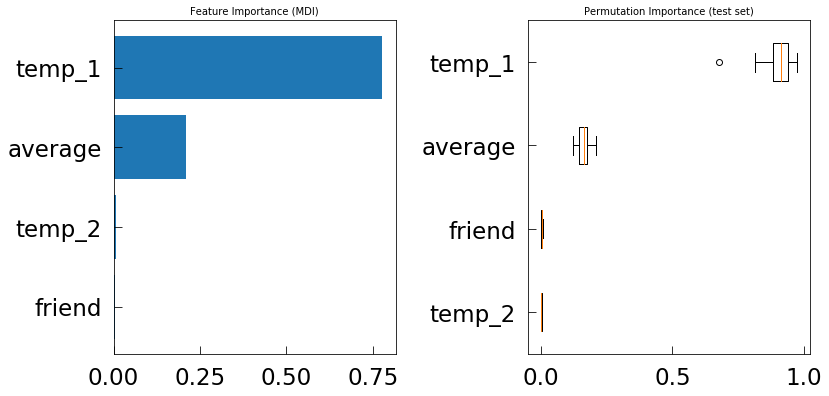

In [31]:
from sklearn.inspection import permutation_importance

feature_importance = w
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(list(X.columns))[sorted_idx])
plt.title('Feature Importance (MDI)',fontsize=10)

result = permutation_importance(RF, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(list(X.columns))[sorted_idx])
plt.title("Permutation Importance (test set)",fontsize=10)
fig.tight_layout()
plt.show()

https://hub.packtpub.com/cross-validation-strategies-for-time-series-forecasting-tutorial/

## Our splitting strategy doesn't seem to represent the reality of the process....

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
y = np.array(features['actual'])

# Remove the labels from the features
# axis 1 refers to the columns
X= features.drop(['Unnamed: 0', 'year', 'month', 'day',
       'actual', 'forecast_noaa', 'forecast_acc', 'forecast_under',
       'week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs',
       'week_Tues', 'week_Wed'], axis = 1)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
print(np.array(X).shape)

X_train=np.array(X)[:int(len(X.index)*0.75),:]                                                                           #random_state = 42)
X_test=np.array(X)[int(len(X.index)*0.75):,:]
y_train=np.array(y)[:int(len(X.index)*0.75)]
y_test=np.array(y)[int(len(X.index)*0.75):]
grid_values = {'criterion': ['mse'],
               'n_estimators':np.arange(600,1200,300), 
               'max_depth':np.arange(2,22,5),
               'min_samples_split':np.arange(2,20,4),
              'min_samples_leaf':np.arange(1,20,4)}# define the hyperparameters you want to test
#with the range over which you want it to be tested.
tscv = TimeSeriesSplit()


    
    
grid_tree_acc = GridSearchCV(RandomForestRegressor(), param_grid = grid_values, scoring='r2',cv=tscv)#Feed it to the GridSearchCV with the right
#score over which the decision should be taken

grid_tree_acc.fit(X_train, y_train)

y_decision_fn_scores_acc=grid_tree_acc.score(X_test,y_test)

print('Grid best parameter (max. r2): ', grid_tree_acc.best_params_)#get the best parameters
print('Grid best score (r2): ', grid_tree_acc.best_score_)#get the best score calculated from the train/validation
#dataset
print('Grid best parameter (max. r2) model on test: ', y_decision_fn_scores_acc)# get the equivalent score on the test
#dataset : again this is the important metric

(348, 4)
Grid best parameter (max. r2):  {'criterion': 'mse', 'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 18, 'n_estimators': 900}
Grid best score (r2):  0.19625197606881503
Grid best parameter (max. r2) model on test:  0.7112121410918981


In [44]:
RF = RandomForestRegressor(criterion=grid_tree_acc.best_params_['criterion'],
                              n_estimators=grid_tree_acc.best_params_['n_estimators'],
                             max_depth=grid_tree_acc.best_params_['max_depth'],
                             min_samples_leaf=grid_tree_acc.best_params_['min_samples_leaf'],
                             min_samples_split=grid_tree_acc.best_params_['min_samples_split'])
RF.fit(X_train, y_train)


w=RF.feature_importances_#get the weights

sorted_features=sorted([[list(X.columns)[i],abs(w[i])] for i in range(len(w))],key=itemgetter(1),reverse=True)

print('Features sorted per importance in discriminative process')
print(sorted_features)

Features sorted per importance in discriminative process
[['temp_1', 0.5998067231305699], ['average', 0.3567575550653574], ['friend', 0.024439959592348365], ['temp_2', 0.018995762211724304]]


In [48]:
RF.score(X_train, y_train)

0.8925128014113664

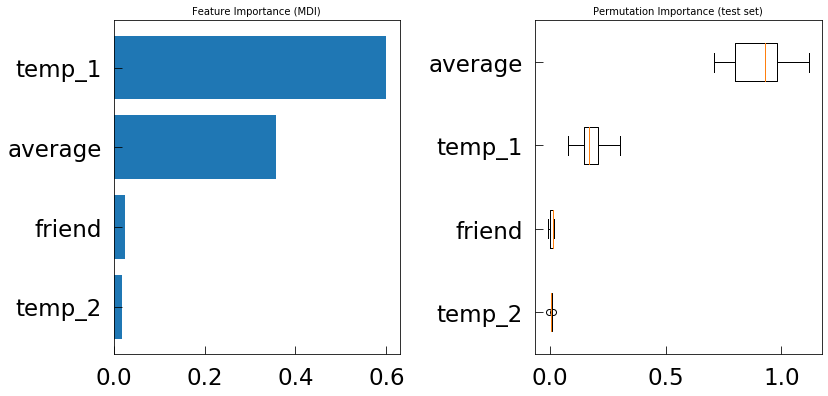

In [45]:
from sklearn.inspection import permutation_importance

feature_importance = w
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(list(X.columns))[sorted_idx])
plt.title('Feature Importance (MDI)',fontsize=10)

result = permutation_importance(RF, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(list(X.columns))[sorted_idx])
plt.title("Permutation Importance (test set)",fontsize=10)
fig.tight_layout()
plt.show()

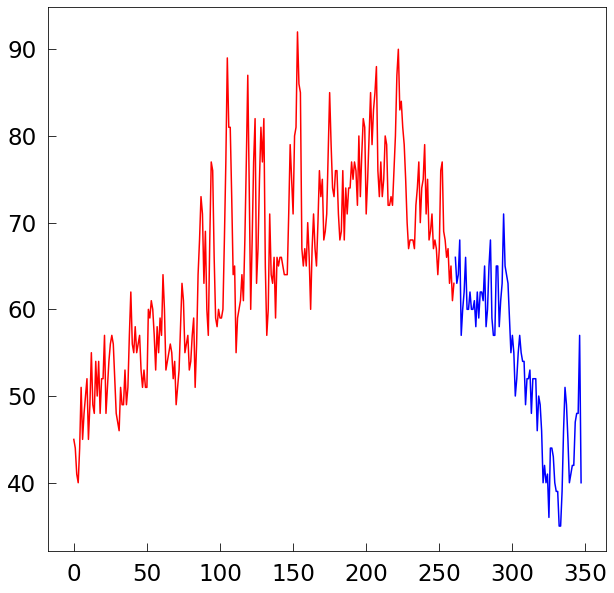

In [46]:
plt.plot(np.arange(len(X.index))[:int(len(X.index)*0.75)],y_train,'r')
plt.plot(np.arange(len(X.index))[int(len(X.index)*0.75):],y_test,'b')
plt.show()

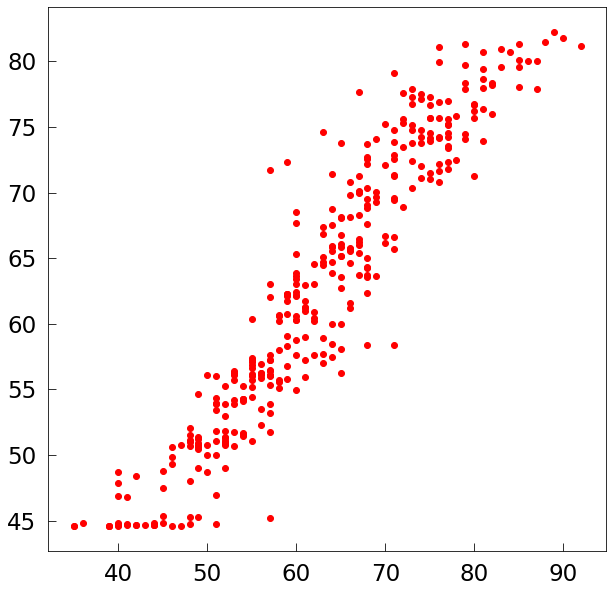

In [47]:
plt.plot(y,RF.predict(X),'ro')

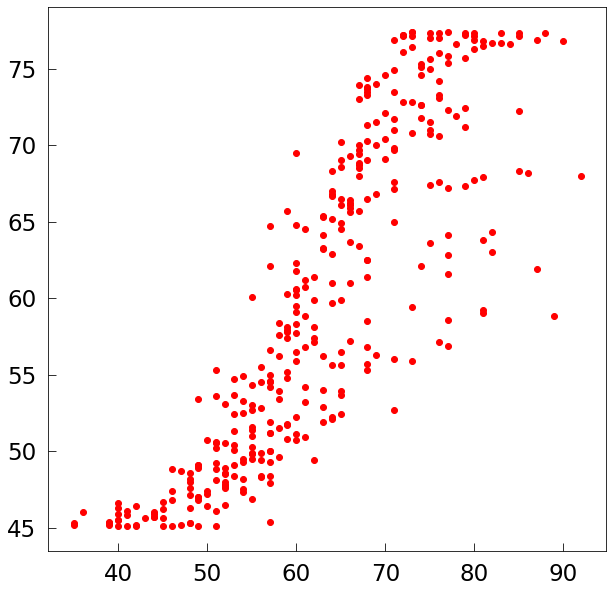

In [49]:
plt.plot(y,features.average,'ro')

## Even better splitting

In [50]:
class BlockingTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
    
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)

        margin = 0
        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            mid = int(0.8 * (stop - start)) + start
            yield indices[start: mid], indices[mid + margin: stop]

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
y = np.array(features['actual'])

# Remove the labels from the features
# axis 1 refers to the columns
X= features.drop(['Unnamed: 0', 'year', 'month', 'day',
       'actual', 'forecast_noaa', 'forecast_acc', 'forecast_under',
       'week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs',
       'week_Tues', 'week_Wed'], axis = 1)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
print(np.array(X).shape)

X_train=np.array(X)[:int(len(X.index)*0.75),:]                                                                           #random_state = 42)
X_test=np.array(X)[int(len(X.index)*0.75):,:]
y_train=np.array(y)[:int(len(X.index)*0.75)]
y_test=np.array(y)[int(len(X.index)*0.75):]
grid_values = {'criterion': ['mse'],
               'n_estimators':np.arange(600,1200,300), 
               'max_depth':np.arange(2,22,5),
               'min_samples_split':np.arange(2,20,4),
              'min_samples_leaf':np.arange(1,20,4)}# define the hyperparameters you want to test
#with the range over which you want it to be tested.
tscv = BlockingTimeSeriesSplit(n_splits=5)


    
    
grid_tree_acc = GridSearchCV(RandomForestRegressor(), param_grid = grid_values, scoring='r2',cv=tscv)#Feed it to the GridSearchCV with the right
#score over which the decision should be taken

grid_tree_acc.fit(X_train, y_train)

y_decision_fn_scores_acc=grid_tree_acc.score(X_test,y_test)

print('Grid best parameter (max. r2): ', grid_tree_acc.best_params_)#get the best parameters
print('Grid best score (r2): ', grid_tree_acc.best_score_)#get the best score calculated from the train/validation
#dataset
print('Grid best parameter (max. r2) model on test: ', y_decision_fn_scores_acc)# get the equivalent score on the test
#dataset : again this is the important metric

(348, 4)
Grid best parameter (max. r2):  {'criterion': 'mse', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 14, 'n_estimators': 600}
Grid best score (r2):  -0.08590177221308319
Grid best parameter (max. r2) model on test:  0.7165324188965232


In [52]:
RF = RandomForestRegressor(criterion=grid_tree_acc.best_params_['criterion'],
                              n_estimators=grid_tree_acc.best_params_['n_estimators'],
                             max_depth=grid_tree_acc.best_params_['max_depth'],
                             min_samples_leaf=grid_tree_acc.best_params_['min_samples_leaf'],
                             min_samples_split=grid_tree_acc.best_params_['min_samples_split'])
RF.fit(X_train, y_train)


w=RF.feature_importances_#get the weights

sorted_features=sorted([[list(X.columns)[i],abs(w[i])] for i in range(len(w))],key=itemgetter(1),reverse=True)

print('Features sorted per importance in discriminative process')
print(sorted_features)

Features sorted per importance in discriminative process
[['temp_1', 0.5975801800503128], ['average', 0.35481416477452415], ['friend', 0.02748199740083891], ['temp_2', 0.020123657774324278]]


In [54]:
RF.score(X_train, y_train)

0.9033243622460115

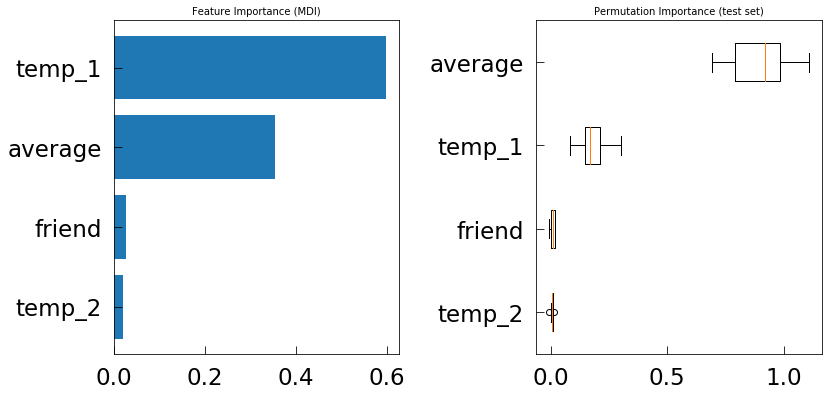

In [53]:
from sklearn.inspection import permutation_importance

feature_importance = w
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(list(X.columns))[sorted_idx])
plt.title('Feature Importance (MDI)',fontsize=10)

result = permutation_importance(RF, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(list(X.columns))[sorted_idx])
plt.title("Permutation Importance (test set)",fontsize=10)
fig.tight_layout()
plt.show()

Text(0.5, 1.0, '0.946546370338203')

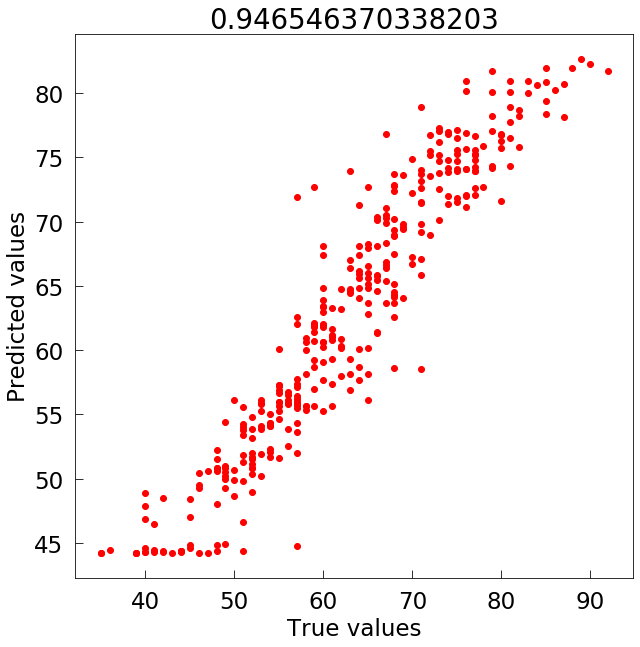

In [56]:
plt.plot(y,RF.predict(X),'ro')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title(str(sc.stats.pearsonr(y,RF.predict(X))[0]))

Text(0.5, 1.0, '0.8483653774165267')

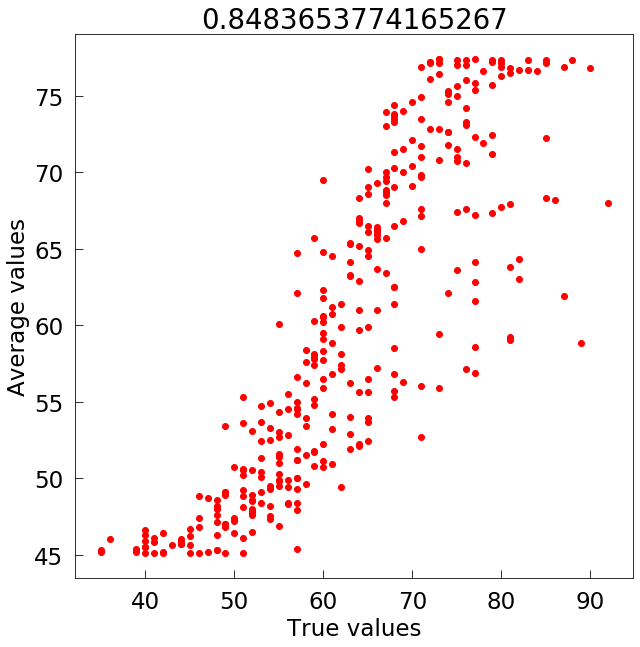

In [57]:
plt.plot(y,features.average,'ro')
plt.xlabel('True values')
plt.ylabel('Average values')
plt.title(str(sc.stats.pearsonr(y,features.average)[0]))